# Money Laundering Detection with various models and an interactive UI

## First let's work on our data 

In [1]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1=pd.read_csv('data\ML.csv')
data2=pd.read_csv('data\MLtag.csv')

In [3]:
# Knowing the data
data1.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1


In [4]:
# Knowing the data
data2.head()

,guiltyid,levelofcrime,typeofcrime
0,30105,head,type1
1,80740,head,type1
2,92735,head,type1
3,1615,head,type1
4,4161,head,type1


In [5]:
# data cleaning
data1.isnull().sum()

typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
dtype: int64

In [6]:
# data cleaning
data2.isnull().sum()

guiltyid        0
levelofcrime    0
typeofcrime     0
dtype: int64

In [7]:
#data cleaning 
data1.dropna(inplace=True)

In [8]:
#data cleaning
data2.dropna(inplace=True)

In [9]:
# get day month and year and hour and minutes from the date
data1['date']=pd.to_datetime(data1['date'])
data1['year']=data1['date'].dt.year
data1['month']=data1['date'].dt.month
data1['day']=data1['date'].dt.day
data1['hour']=data1['date'].dt.hour
data1['minute']=data1['date'].dt.minute
data1.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud,year,month,day,hour,minute
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1,2019,7,19,14,40
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1,2019,5,17,14,57
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1,2019,7,20,13,20
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1,2019,7,3,14,15
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1,2019,5,26,10,40


In [10]:
#type of action  and typeoffraud to categorical
data1['typeofaction']=data1['typeofaction'].astype('category')
data1['typeofaction']=data1['typeofaction'].cat.codes
data1['typeoffraud']=data1['typeoffraud'].astype('category')
data1['typeoffraud']=data1['typeoffraud'].cat.codes
data1.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud,year,month,day,hour,minute
0,0,30105,28942,494528,2019-07-19 14:40:00,1,1,2019,7,19,14,40
1,0,30105,8692,494528,2019-05-17 14:57:00,1,1,2019,5,17,14,57
2,0,30105,60094,494528,2019-07-20 13:20:00,1,1,2019,7,20,13,20
3,0,30105,20575,494528,2019-07-03 14:15:00,1,1,2019,7,3,14,15
4,0,30105,45938,494528,2019-05-26 10:40:00,1,1,2019,5,26,10,40


In [11]:
data2['levelofcrime'].value_counts()

colleague    1367
head          117
Name: levelofcrime, dtype: int64

In [12]:
# data2 levelofcrime to categorical
data2['levelofcrime']=data2['levelofcrime'].astype('category')
data2['levelofcrime']=data2['levelofcrime'].cat.codes
data2.head()

,guiltyid,levelofcrime,typeofcrime
0,30105,1,type1
1,80740,1,type1
2,92735,1,type1
3,1615,1,type1
4,4161,1,type1


In [13]:
data2['levelofcrime'].value_counts()

0    1367
1     117
Name: levelofcrime, dtype: int64

In [14]:
data1.drop('typeoffraud',axis=1,inplace=True)
data1.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,year,month,day,hour,minute
0,0,30105,28942,494528,2019-07-19 14:40:00,1,2019,7,19,14,40
1,0,30105,8692,494528,2019-05-17 14:57:00,1,2019,5,17,14,57
2,0,30105,60094,494528,2019-07-20 13:20:00,1,2019,7,20,13,20
3,0,30105,20575,494528,2019-07-03 14:15:00,1,2019,7,3,14,15
4,0,30105,45938,494528,2019-05-26 10:40:00,1,2019,5,26,10,40


In [15]:
# percentage of isfraud values
data1['isfraud'].value_counts()

1    1399
0     941
Name: isfraud, dtype: int64

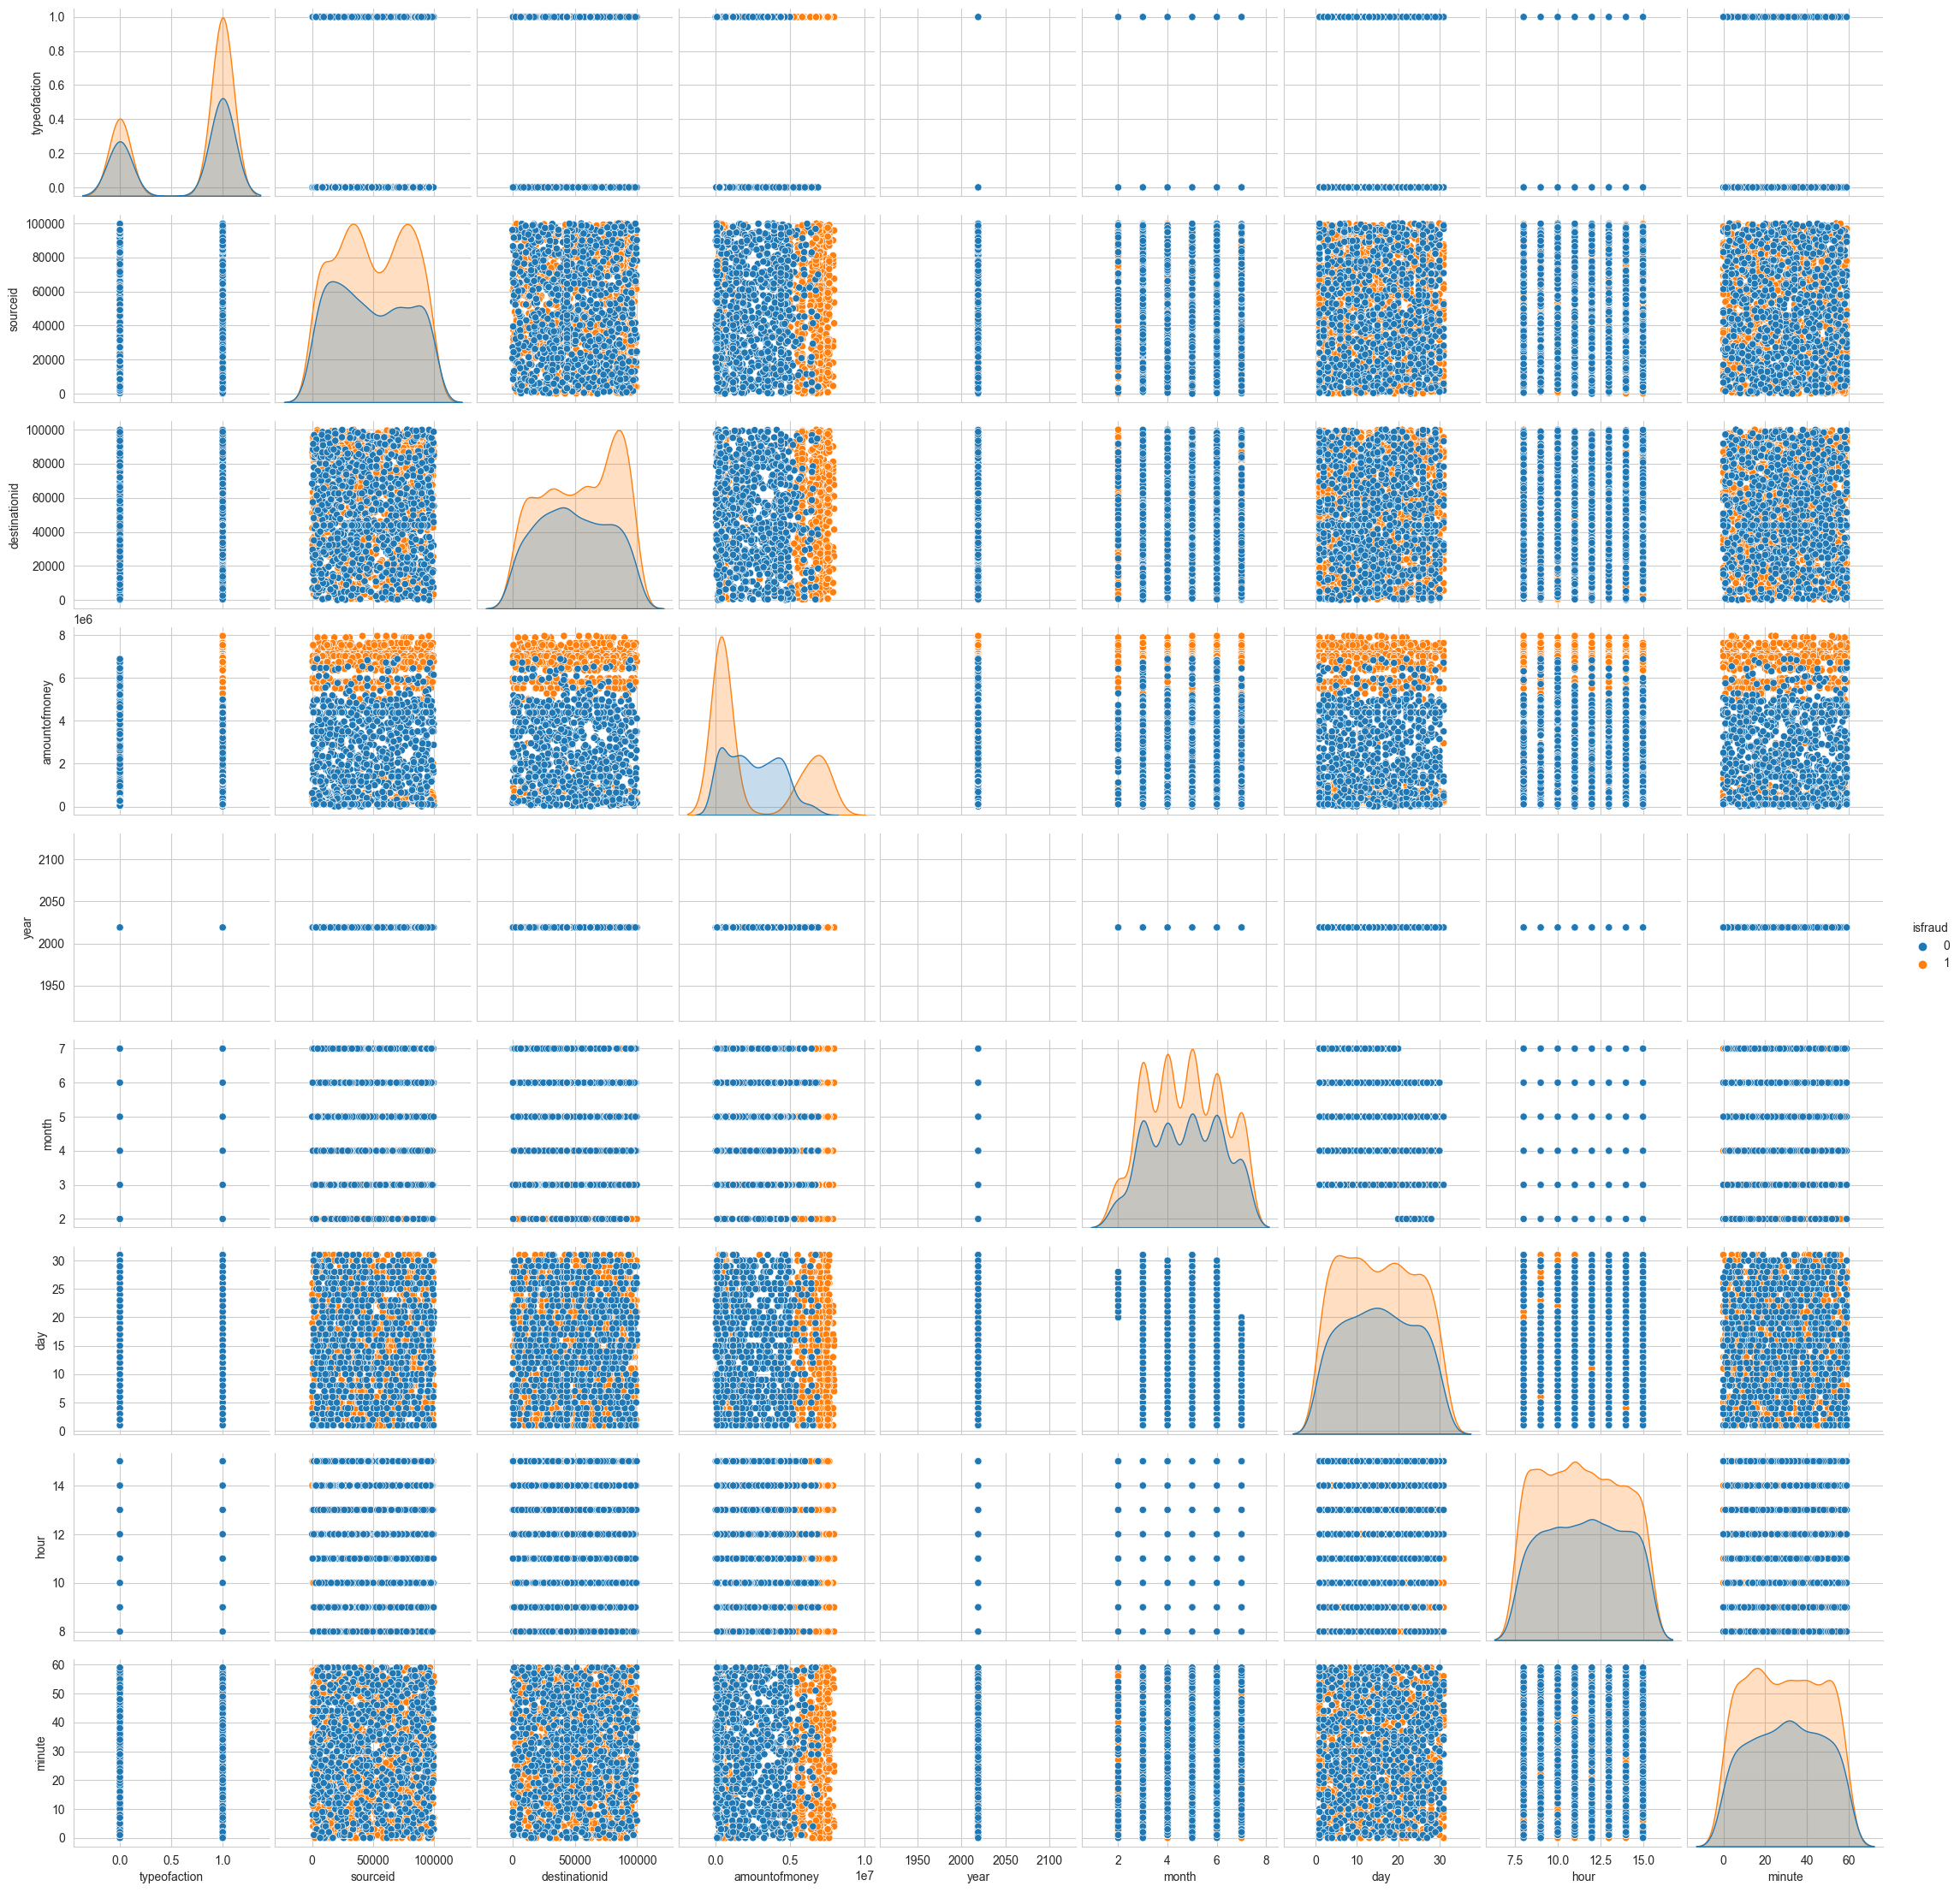

In [16]:
sns.set_style("whitegrid");
sns.pairplot(data1, hue="isfraud");
plt.show()

<AxesSubplot:ylabel='count'>

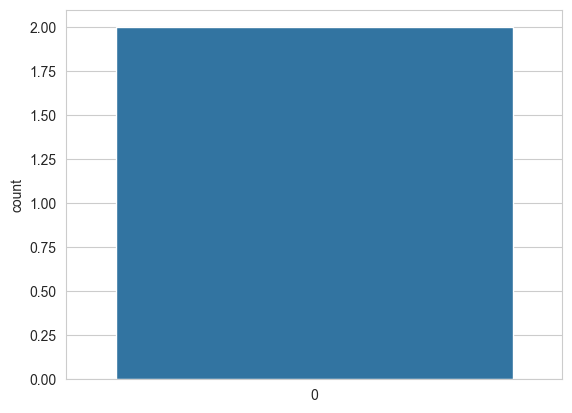

In [17]:
sns.countplot(data1['typeofaction'].unique())

<AxesSubplot:ylabel='count'>

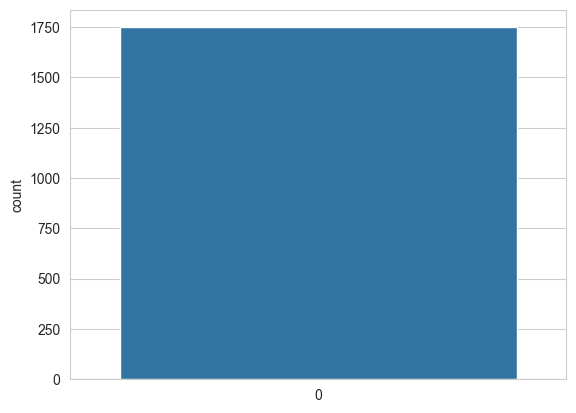

In [18]:
sns.countplot(data1['sourceid'].unique())

<AxesSubplot:ylabel='count'>

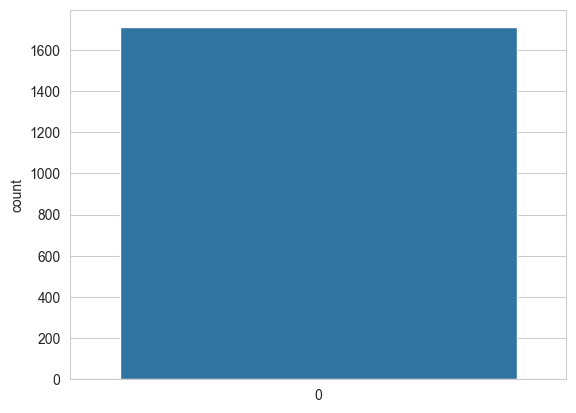

In [19]:
sns.countplot(data1['destinationid'].unique())

<AxesSubplot:ylabel='count'>

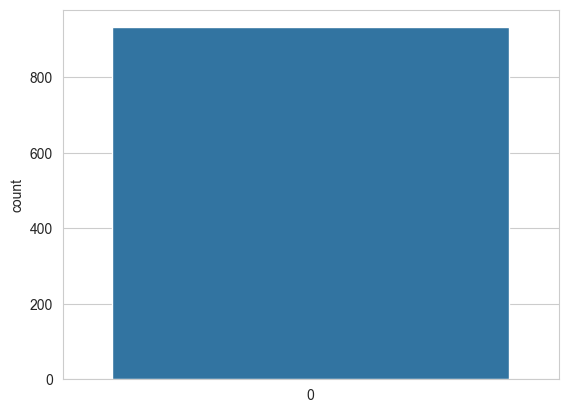

In [20]:
sns.countplot(data1['amountofmoney'].unique())

<AxesSubplot:ylabel='count'>

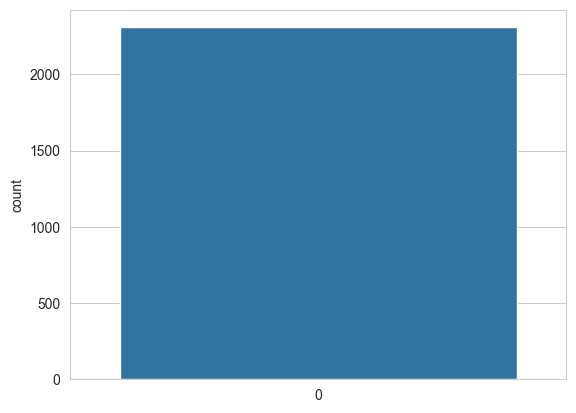

In [21]:
sns.countplot(data1['date'].unique())

<AxesSubplot:ylabel='count'>

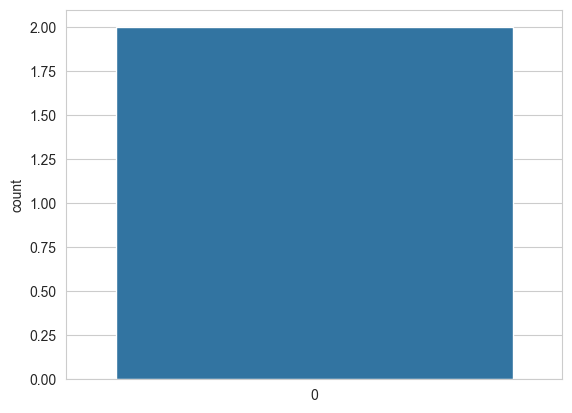

In [22]:
sns.countplot(data1['isfraud'].unique())

In [23]:
data1.drop('date',axis=1,inplace=True)

<AxesSubplot:>

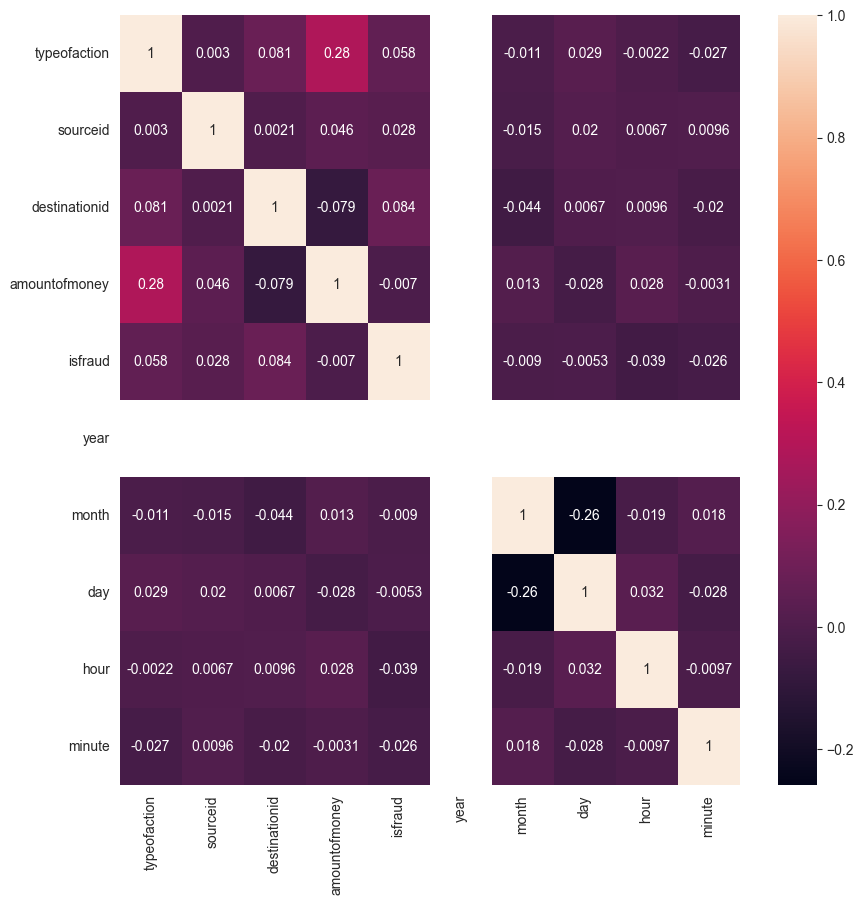

In [24]:
#correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(),annot=True)

In [25]:
#feature selection
X=data1.drop('isfraud',axis=1)
y=data1['isfraud']


# Let's start the model

In [26]:
#feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs          Score
3  amountofmoney  296031.222043
2  destinationid  265713.164204
1       sourceid   31801.039523
8         minute      15.655096
0   typeofaction       2.591578
7           hour       1.636757
6            day       0.327784
5          month       0.086457
4           year       0.000000


array([[<AxesSubplot:title={'center':'Score'}>]], dtype=object)

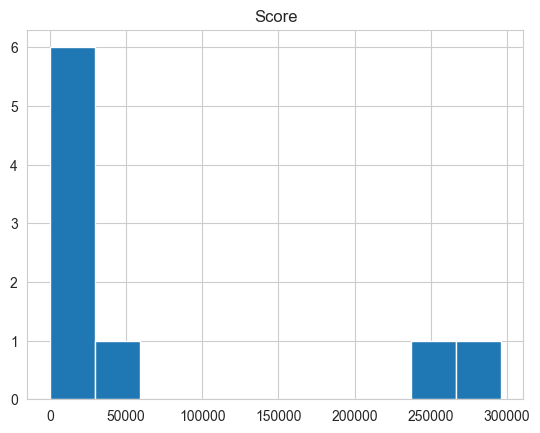

In [27]:
featureScores.hist()

In [28]:
#KEEPING THE BEST FEATURES
X=data1[['typeofaction','amountofmoney','hour','minute']]
y=data1['isfraud']

In [29]:
#pca analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
                , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data1[['isfraud']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,isfraud
0,-2.014055e+06,-10.324989,1
1,-2.014055e+06,-27.324970,1
2,-2.014055e+06,9.673700,1
3,-2.014055e+06,14.674984,1
4,-2.014055e+06,-10.330146,1


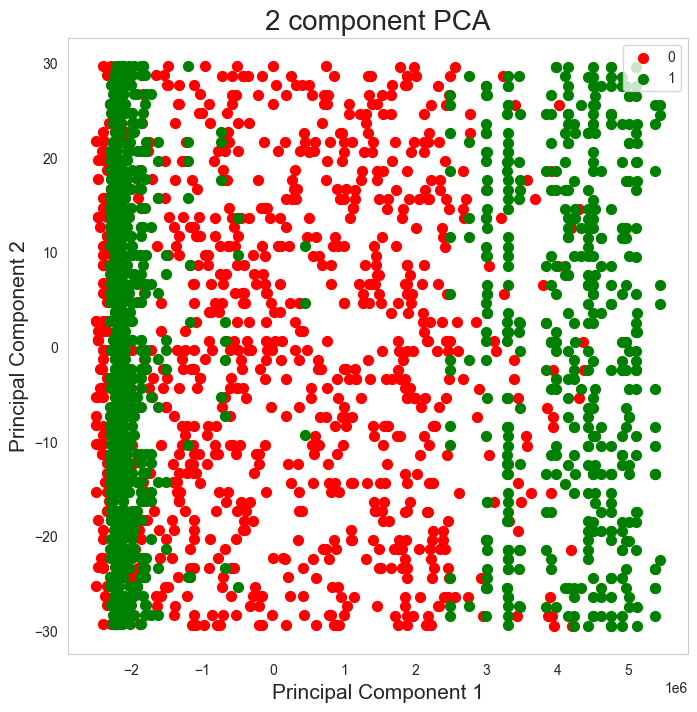

In [30]:
#plotting pca
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['isfraud'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
y.value_counts()

1    1399
0     941
Name: isfraud, dtype: int64

In [32]:
#oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_resample(X, y.ravel())

In [33]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.95


[[254  23]
 [  5 278]]


<AxesSubplot:>

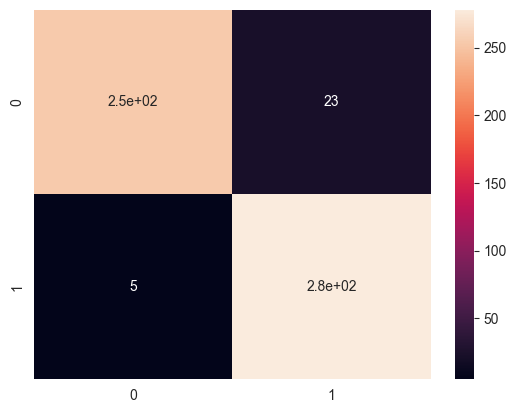

In [34]:
#plot random forest classifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

In [35]:
#best parameters for random forest classifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)   
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [36]:
#random forest classifier with best parameters
rfc = RandomForestClassifier(bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9446428571428571


In [37]:
#create a pickle file using serialization
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(rfc, pickle_out)
pickle_out.close()

In [38]:
#XGBOOST 
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9678571428571429


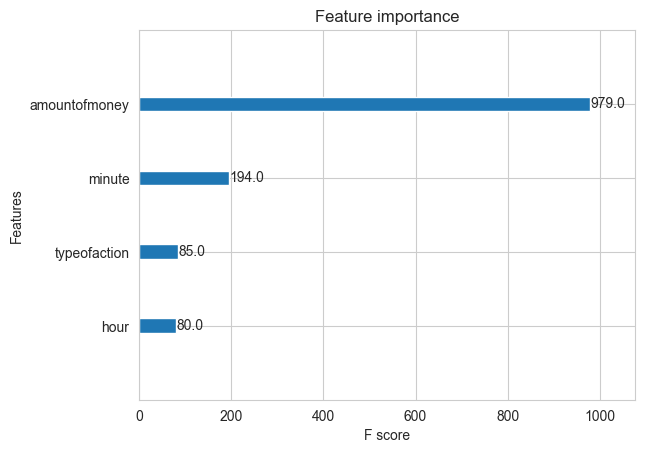

In [39]:
# XGBOOSt feature importance with names of features
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb)
pyplot.show()

[[262  15]
 [  3 280]]


<AxesSubplot:>

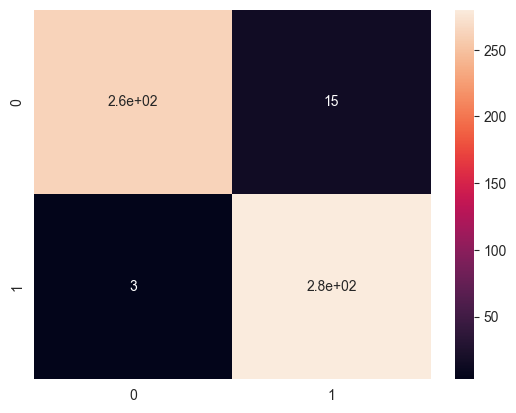

In [40]:
#accuracy of XGBOOST
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

In [41]:
#best parameters for XGBOOST
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}
xgb = XGBClassifier()
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)           
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 320 candidates, totalling 960 fits


{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 900}

In [42]:
#XGBOOST with best parameters
xgb = XGBClassifier(learning_rate=0.2, max_depth=6, n_estimators=400)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9732142857142857


In [43]:
#create a pickle file using serialization
import pickle
pickle_out = open("classifier2.pkl","wb")
pickle.dump(xgb, pickle_out)
pickle_out.close()

In [44]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.49464285714285716


[[277   0]
 [283   0]]


<AxesSubplot:>

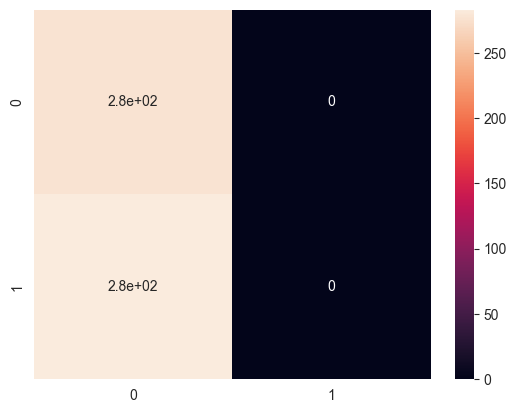

In [45]:
# logistic regression confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

Feature: 0, Score: 0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000


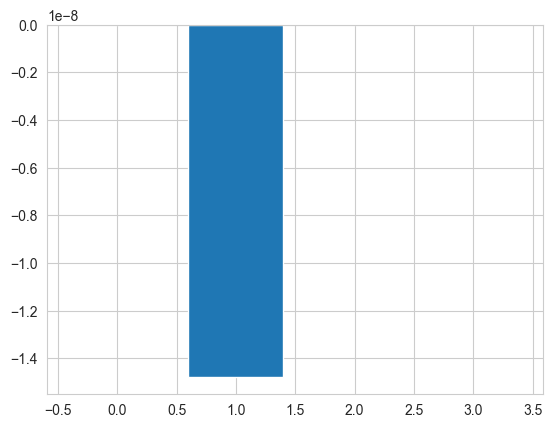

In [46]:
#logistic regression important features
importance = logreg.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [47]:
#best parameters for logistic regression
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}
logreg = LogisticRegression()
grid_search = GridSearchCV(estimator = logreg, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)   
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 14 candidates, totalling 42 fits


{'C': 0.001, 'penalty': 'l2'}

In [48]:
#logistic with best parameters
logreg = LogisticRegression(C=0.001, penalty='l2')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.49464285714285716


In [49]:
#create a pickle file using serialization
import pickle
pickle_out = open("classifier3.pkl","wb")
pickle.dump(logreg, pickle_out)
pickle_out.close()

In [50]:
#svm
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8232142857142857


[[186  91]
 [  8 275]]


<AxesSubplot:>

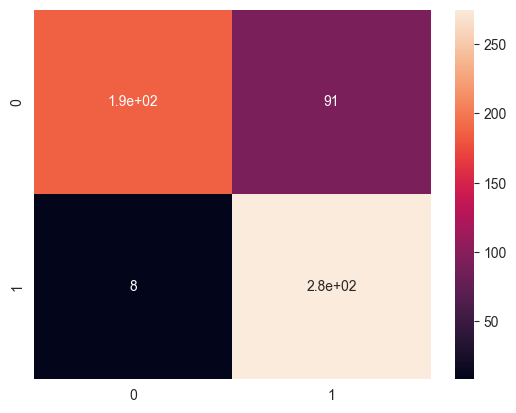

In [51]:
#metrics of svm
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

In [52]:
# best parametres for svm
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}
svm = SVC()
grid_search = GridSearchCV(estimator = svm, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_


Fitting 3 folds for each of 25 candidates, totalling 75 fits


{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [53]:
#svm with best parametrs 
svm = SVC(C=1, gamma=0.0001, kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [54]:
#create a pickle file using serialization
import pickle
pickle_out = open("classifier4.pkl","wb")
pickle.dump(svm, pickle_out)
pickle_out.close()

In [55]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9357142857142857


[[245  32]
 [  4 279]]


<AxesSubplot:>

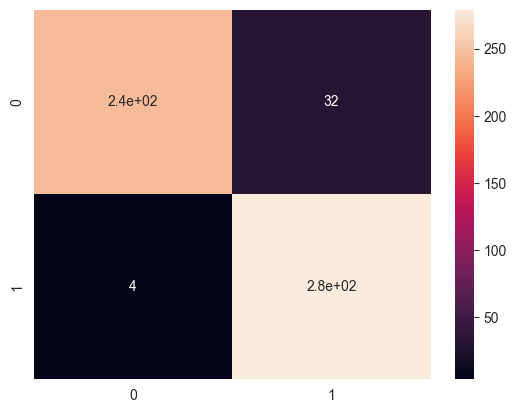

In [56]:
#metrics of knn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

In [57]:
#best parameters for knn
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}

In [69]:
#KNN with best parameters
knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.975


In [70]:
#create a pickle file using serialization
import pickle
pickle_out = open("classifier5.pkl","wb")
pickle.dump(knn, pickle_out)
pickle_out.close()

In [71]:
#KNN feature importance
importance = knn.kneighbors(X_train, n_neighbors=10, return_distance=False)
print(importance)

[[   0  579 2112 ...   95  400 1685]
 [   1  449 1774 ... 1691 1198  320]
 [   2 2218 1099 ... 1665 1673 1102]
 ...
 [2235 2197  364 ...  574 2003 1985]
 [2236  146 1683 ...  279 2096  182]
 [2237 2126  340 ... 1936  879 1262]]


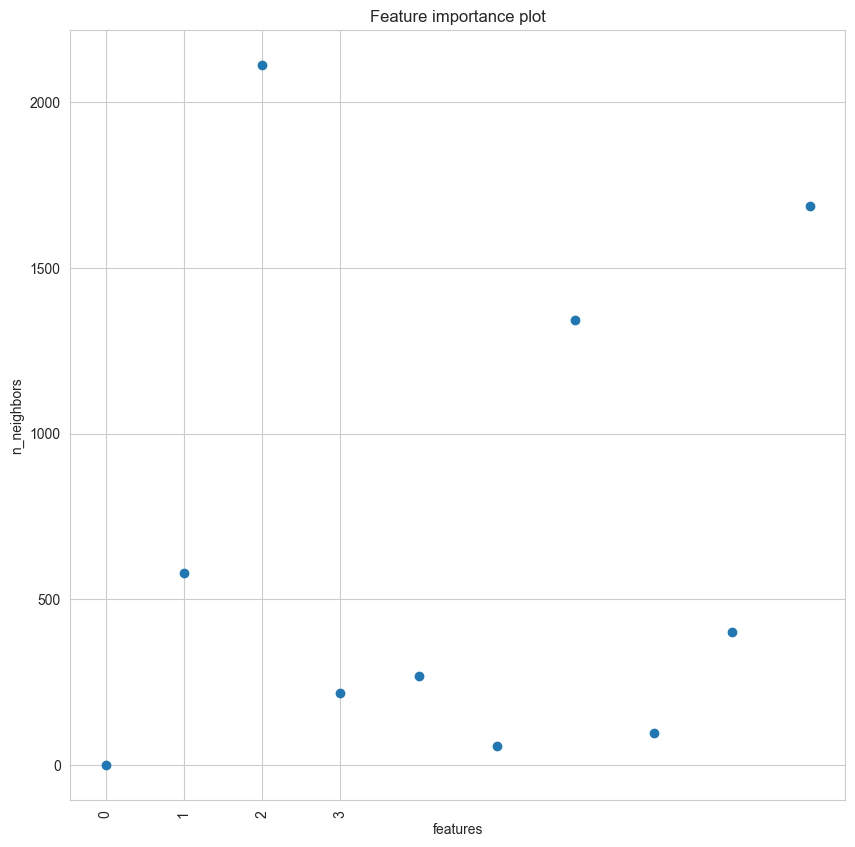

In [72]:
#plot of feature importance
plt.figure(figsize=(10, 10))
plt.plot(importance[0], 'o')
plt.xticks(range(X_train.shape[-1]),rotation=90)
plt.ylabel('n_neighbors')
plt.xlabel('features')
plt.title('Feature importance plot')
plt.show()

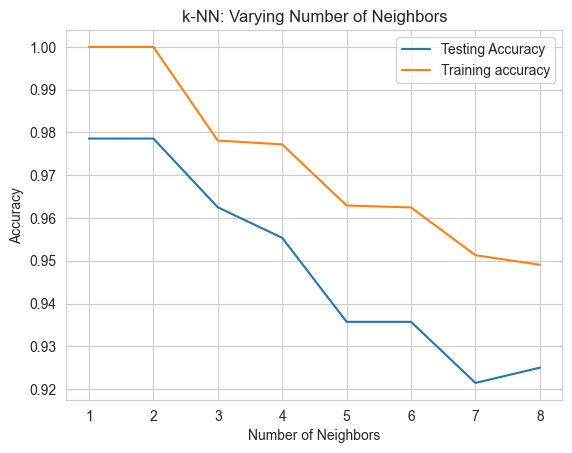

In [73]:
#effect of neighbors on accuracy
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [74]:
#cross validation comparison on all models
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=rfc,X=X_train,y=y_train,cv=10)
print("Random Forest Classifier Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
accuracies=cross_val_score(estimator=xgb,X=X_train,y=y_train,cv=10)
print("XGBOOST Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
accuracies=cross_val_score(estimator=logreg,X=X_train,y=y_train,cv=10)
print("Logistic Regression Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
accuracies=cross_val_score(estimator=svm,X=X_train,y=y_train,cv=10)
print("SVM Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
accuracies=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=10)
print("KNN Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Random Forest Classifier Accuracy: 94.64 %
Standard Deviation: 1.60 %
XGBOOST Accuracy: 96.96 %
Standard Deviation: 1.45 %
Logistic Regression Accuracy: 50.13 %
Standard Deviation: 0.18 %
SVM Accuracy: 99.78 %
Standard Deviation: 0.46 %
KNN Accuracy: 93.52 %
Standard Deviation: 2.56 %
